In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from preprocessingFunction import fill_missing_values



In [2]:
train_df = pd.read_excel('FlightPrediction/Data_Train.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_test = pd.read_excel('FlightPrediction/Test_set.xlsx')
train_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
train_df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
train_df.describe(include='all') #include all

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
train_df.duplicated().sum() #Checking duplicates

220

In [12]:
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
train_df.Date_of_Journey.value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [14]:
train_df['Date'] = train_df.Date_of_Journey.str.split("/").str[0] #slicing above date data
train_df['Month'] = train_df.Date_of_Journey.str.split("/").str[1]
train_df['Year'] = train_df.Date_of_Journey.str.split("/").str[2]

In [15]:
train_df['Date'] = train_df['Date'].astype(int)
train_df['Month'] = train_df['Month'].astype(int) #convert to int
train_df['Year'] = train_df['Year'].astype(int)

In [16]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [17]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [18]:
train_df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [19]:
train_df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [20]:
#train_df.Route.unique()

In [21]:
train_df.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [22]:
train_df['Dept_hour'] = train_df['Dep_Time'].str.split(':').str[0]
train_df['Dept_min'] = train_df['Dep_Time'].str.split(':').str[1]

In [23]:
# now convert to integer
train_df['Dept_hour'] = train_df['Dept_hour'].astype(int)
train_df['Dept_min'] = train_df['Dept_min'].astype(int)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Dept_hour        10683 non-null  int32 
 14  Dept_min         10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [25]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [26]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [27]:
# check how they behave
train_df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [28]:
train_df.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [29]:
        #apply on entier arrival time  x - 1st data
train_df['Arrival_Time']= train_df.Arrival_Time.apply(lambda x : x.split(" ")[0])
                        # here x means only taking x

In [30]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [31]:
train_df['Arrival_hour'] = train_df['Arrival_Time'].str.split(':').str[0]
train_df['Arrival_min'] = train_df['Arrival_Time'].str.split(':').str[1]

In [32]:
train_df['Arrival_hour'] = train_df['Arrival_hour'].astype(int)
train_df['Arrival_min'] = train_df['Arrival_min'].astype(int)

In [33]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [34]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Dept_hour        10683 non-null  int32 
 12  Dept_min         10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [36]:
train_df.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [37]:
train_df['Duration_hour'] =train_df.Duration.apply(lambda x: x.split("h")[0])

In [38]:
train_df[train_df['Duration_hour']=='5m'] #from duration we neeed to delete '5m' info so 1st we explore the row
# display row hwere value '5m' is assigned

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m


In [39]:
train_df.drop(6474,axis=0,inplace=True)

In [40]:
train_df['Duration_hour'] = train_df['Duration_hour'].astype(int)

In [41]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [42]:
train_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [43]:
fill_value = 0 
fill_types = ["Mode_Fill"]
columns = ["Total_Stops"]
dataframe_name = "Train"
fill_missing_values(train_df,fill_value, fill_types, columns, dataframe_name) 

Missing Values BEFORE REMOVAL in  Train  data


Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dept_hour          0
Dept_min           0
Arrival_hour       0
Arrival_min        0
Duration_hour      0
dtype: int64

Missing Values AFTER REMOVAL in  Train  data


Airline            0
Source             0
Destination        0
Route              1
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dept_hour          0
Dept_min           0
Arrival_hour       0
Arrival_min        0
Duration_hour      0
dtype: int64

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2


In [44]:
train_df.drop(['Route'],axis=1,inplace=True)

In [45]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [46]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [47]:
 # no need to do manual dict creation
from sklearn.preprocessing import LabelEncoder # fit tranasform fit_transform
labelencoder_airlines = LabelEncoder()
labelencoder_Source = LabelEncoder()
labelencoder_Desitnation = LabelEncoder()
labelencoder_Additional_Info =LabelEncoder()
labelencoder_Total_Stops = LabelEncoder()

In [48]:
train_df['Airline'] = labelencoder_airlines.fit_transform(train_df['Airline']) # 2 steps !st === fit then ====transform ,3 method fit_transform in one step

In [49]:
labelencoder_airlines.transform(["IndiGo"]) # method to check the rank
                                            # transform has it's rank

array([3])

In [50]:
train_df['Additional_Info'] = labelencoder_Additional_Info.fit_transform(train_df['Additional_Info'])
train_df['Source'] = labelencoder_Source.fit_transform(train_df['Source'])
train_df['Destination'] = labelencoder_Desitnation.fit_transform(train_df['Destination'])


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  int32 
 1   Source           10682 non-null  int32 
 2   Destination      10682 non-null  int32 
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10682 non-null  int32 
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   Dept_hour        10682 non-null  int32 
 10  Dept_min         10682 non-null  int32 
 11  Arrival_hour     10682 non-null  int32 
 12  Arrival_min      10682 non-null  int32 
 13  Duration_hour    10682 non-null  int32 
dtypes: int32(12), int64(1), object(1)
memory usage: 751.1+ KB


In [52]:
train_df['Total_Stops'] = labelencoder_Total_Stops.fit_transform(train_df['Total_Stops'])

In [53]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour
0,3,0,5,4,8,3897,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302,1,3,2019,16,50,21,35,4


In [54]:
price_data = train_df['Price']
train_df.drop(['Price'],axis = 1 , inplace=True)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(train_df)

In [56]:
new_train = pd.DataFrame(new_data,columns = train_df.columns)

In [57]:
new_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,1.237288,-1.467707,0.0,1.654268,-0.234932,-1.800319,-0.889984,-0.970831
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.050813,-0.587017,-0.382238
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,-0.531796,1.109082,0.0,-0.607172,0.031502,-1.362943,0.018918,1.030385
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.177979,0.250153,0.0,0.958440,-1.034235,1.407109,0.321885,-0.617675
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,-1.475307,-1.467707,0.0,0.610527,1.363674,1.115525,0.624852,-0.735394


In [58]:
new_train['price']= price_data
price_data

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [59]:
new_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour,price
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,1.237288,-1.467707,0.0,1.654268,-0.234932,-1.800319,-0.889984,-0.970831,3897.0
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.050813,-0.587017,-0.382238,7662.0
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,-0.531796,1.109082,0.0,-0.607172,0.031502,-1.362943,0.018918,1.030385,13882.0
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.177979,0.250153,0.0,0.958440,-1.034235,1.407109,0.321885,-0.617675,6218.0
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,-1.475307,-1.467707,0.0,0.610527,1.363674,1.115525,0.624852,-0.735394,13302.0


In [60]:
# 4 
sns.barplot('')b

SyntaxError: invalid syntax (Temp/ipykernel_21480/1030094442.py, line 2)

In [ ]:
# Outliers
#===========

train_df['Dept_hour'].mean()

12.490357610934282

In [ ]:
# Dropping the Outliers rows wit std 
# mean + 3*std --> upperlimit
# mean - 3* std --> lowerlimit

upperlimit = train_df['Dept_hour'].mean() + 3*train_df['Dept_hour'].std()
lowerlimit = train_df['Dept_hour'].mean() - 3*train_df['Dept_hour'].std()


In [ ]:
upperlimit

29.736814450632565

In [ ]:
lowerlimit
train_df['Price'] = price_data

In [ ]:
train_df[train_df['Dept_hour'] < upperlimit] #checking values below upperlimmit

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour,Additional_info
0,3,0,5,4,8,24,3,2019,22,20,1,10,2,8
1,1,3,0,1,8,1,5,2019,5,50,13,15,7,8
2,4,2,1,1,8,9,6,2019,9,25,4,25,19,8
3,3,3,0,0,8,12,5,2019,18,5,23,30,5,8
4,3,0,5,0,8,1,3,2019,16,50,21,35,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,9,4,2019,19,55,22,25,2,8
10679,1,3,0,4,8,27,4,2019,20,45,23,20,2,8
10680,4,0,2,4,8,27,4,2019,8,20,11,20,3,8
10681,10,0,5,4,8,1,3,2019,11,30,14,10,2,8


In [ ]:
train_df.shape

(10682, 14)

In [ ]:
upperlimit = train_df['Price'].mean() + 3*train_df['Price'].std()
lowerlimit = train_df['Price'].mean() - 3*train_df['Price'].std()


In [ ]:
upperlimit

22918.94982142857

In [ ]:
lowerlimit

-4746.364350542966

In [ ]:
train_df[train_df['Price'] < upperlimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour,Additional_info,Price
0,3,0,5,4,8,24,3,2019,22,20,1,10,2,8,3897
1,1,3,0,1,8,1,5,2019,5,50,13,15,7,8,7662
2,4,2,1,1,8,9,6,2019,9,25,4,25,19,8,13882
3,3,3,0,0,8,12,5,2019,18,5,23,30,5,8,6218
4,3,0,5,0,8,1,3,2019,16,50,21,35,4,8,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,9,4,2019,19,55,22,25,2,8,4107
10679,1,3,0,4,8,27,4,2019,20,45,23,20,2,8,4145
10680,4,0,2,4,8,27,4,2019,8,20,11,20,3,8,7229
10681,10,0,5,4,8,1,3,2019,11,30,14,10,2,8,12648


In [ ]:
train_df.shape #here we can see difference in 100 rows

(10682, 15)

In [ ]:
10682 - 10586

96

In [ ]:
train_df[train_df['Price'] > upperlimit] # above mentioned 96 rows shootup prices

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour,Additional_info,Price
123,1,2,1,0,8,1,3,2019,23,0,19,15,20,8,27430
396,6,2,1,0,8,1,3,2019,12,50,19,15,6,8,36983
486,4,0,5,0,8,1,3,2019,8,55,15,15,6,8,26890
510,4,0,5,0,8,1,3,2019,7,0,12,25,5,8,26890
597,1,4,3,1,8,6,3,2019,9,40,15,15,29,8,25139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,6,3,2019,19,50,16,50,21,8,24210
10364,5,0,5,0,3,1,3,2019,9,45,14,25,4,3,57209
10383,4,0,5,0,8,1,3,2019,7,0,5,5,22,8,26890
10439,4,0,5,0,8,1,3,2019,18,40,9,0,14,8,31825


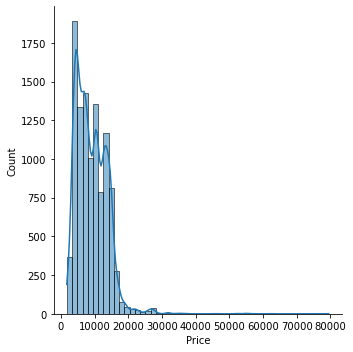

In [ ]:
sns.displot(train_df['Price'],bins = 50,kde = True)
#sns.displot(train_df['Price'],bins = 50)

In [ ]:
train_df['Price'].max()

79512

In [ ]:
train_df['Price'].min()

1759

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

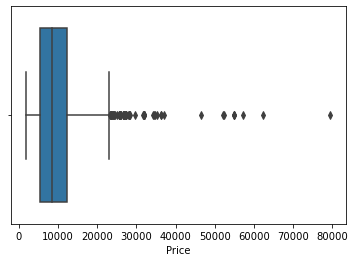

In [ ]:
sns.boxplot('Price',data= train_df)

In [ ]:
# approcah 2
# Dropping the outliers rows with percentilesb

In [ ]:
# drop or cap index                               #name of the col
train_df.loc[train_df['Price'] > upperlimit,'Price']  # here we get loc and values that are above upperlimit (only for price)

123      27430
396      36983
486      26890
510      26890
597      25139
         ...  
10353    24210
10364    57209
10383    26890
10439    31825
10511    26480
Name: Price, Length: 96, dtype: int64

In [ ]:
train_df.loc[train_df['Price'] > upperlimit,'Price'] = upperlimit 
# now we capped outliers with upperlimit

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

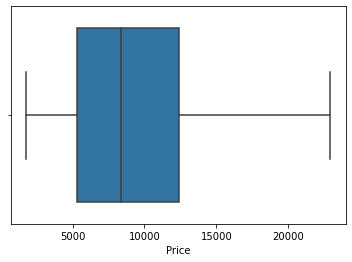

In [ ]:
sns.boxplot(train_df['Price'])

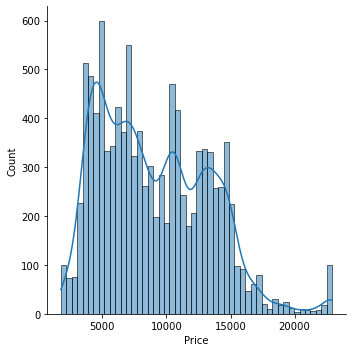

In [ ]:
sns.displot(train_df['Price'],bins=50,kde = True)

In [ ]:
train_df['Price'].max() # mapped to upperlimit

22918.94982142857